In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df["Name"] = le.fit_transform(df["Name"])
df["Age"] = le.fit_transform(df["Age"])
df["Ticket"] = le.fit_transform(df["Ticket"])
df["Cabin"] = le.fit_transform(df["Cabin"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    int32  
 4   Sex          418 non-null    int32  
 5   Age          418 non-null    int64  
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    int32  
 9   Fare         417 non-null    float64
 10  Cabin        418 non-null    int32  
 11  Embarked     418 non-null    int32  
dtypes: float64(1), int32(5), int64(6)
memory usage: 31.1 KB


In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,1,44,0,0,152,7.8292,76,1
1,893,1,3,403,0,60,1,0,221,7.0000,76,2
2,894,0,2,269,1,74,0,0,73,9.6875,76,1
3,895,0,3,408,1,34,0,0,147,8.6625,76,2
4,896,1,3,178,0,27,1,1,138,12.2875,76,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,353,1,79,0,0,267,8.0500,76,2
414,1306,1,1,283,0,51,0,0,324,108.9000,22,0
415,1307,0,3,332,1,50,0,0,346,7.2500,76,2
416,1308,0,3,384,1,79,0,0,220,8.0500,76,2


In [9]:
df5 = df.corr()
df5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.023245,-0.026751,0.042079,0.023245,-0.012103,0.003818,0.043080,-0.012301,0.008211,0.012060,0.040699
Survived,-0.023245,1.000000,-0.108615,-0.067263,-1.000000,-0.059908,0.099943,0.159120,0.047663,0.191514,-0.127938,-0.076281
Pclass,-0.026751,-0.108615,1.000000,0.038918,0.108615,-0.093558,0.001087,0.018721,0.292088,-0.577147,0.660165,0.227983
Name,0.042079,-0.067263,0.038918,1.000000,0.067263,0.122963,0.043994,-0.010295,0.025531,-0.017685,0.040390,-0.081444
Sex,0.023245,-1.000000,0.108615,0.067263,1.000000,0.059908,-0.099943,-0.159120,-0.047663,-0.191514,0.127938,0.076281
Age,-0.012103,-0.059908,-0.093558,0.122963,0.059908,1.000000,-0.112911,-0.034970,-0.027642,0.079043,-0.107625,-0.176294
SibSp,0.003818,0.099943,0.001087,0.043994,-0.099943,-0.112911,1.000000,0.306895,0.025199,0.171539,-0.080243,0.052708
Parch,0.043080,0.159120,0.018721,-0.010295,-0.159120,-0.034970,0.306895,1.000000,0.109888,0.230046,-0.045538,0.054577
Ticket,-0.012301,0.047663,0.292088,0.025531,-0.047663,-0.027642,0.025199,0.109888,1.000000,-0.018921,0.162064,0.093672
Fare,0.008211,0.191514,-0.577147,-0.017685,-0.191514,0.079043,0.171539,0.230046,-0.018921,1.000000,-0.574490,-0.257183


In [10]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1 , inplace = True)

In [11]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,44,7.8292
1,1,3,0,60,7.0000
2,0,2,1,74,9.6875
3,0,3,1,34,8.6625
4,1,3,0,27,12.2875
...,...,...,...,...,...
413,0,3,1,79,8.0500
414,1,1,0,51,108.9000
415,0,3,1,50,7.2500
416,0,3,1,79,8.0500


In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        1
dtype: int64

In [13]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

Q.Which sex people is more survived ??

<Axes: xlabel='Survived', ylabel='count'>

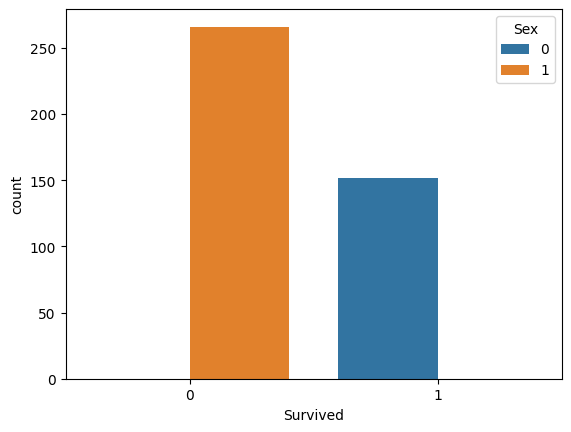

In [15]:
sns.countplot(df, x="Survived",hue="Sex")

Q.Which class Passengers are more survived ??

<Axes: xlabel='Survived', ylabel='count'>

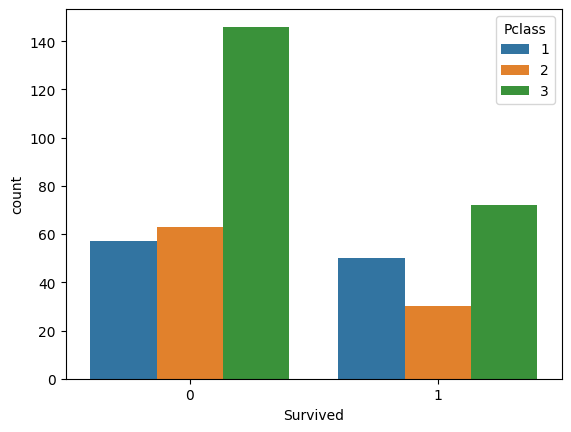

In [16]:
sns.countplot(df, x="Survived",hue="Pclass")

Q.Which age People are more affected ??

<Axes: xlabel='Age', ylabel='Count'>

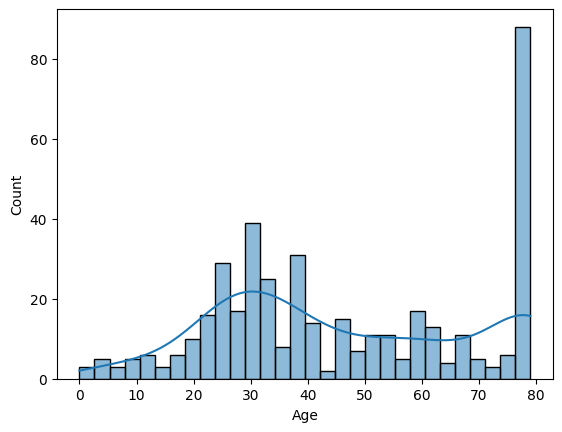

In [17]:
sns.histplot(df,x="Age",bins=30,kde=True)

Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["Survived"],axis =1)
y = df["Survived"]
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2)

In [19]:
df.shape

(418, 5)

Support Vector Machine (SVM) is used in this classification Problem

In [20]:
model = SVC(kernel='linear') 
model.fit(X, y)

SVC(kernel='linear')

In [21]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [22]:
acc1 = model.score(X_test,y_test)

In [23]:
acc_svm = round(acc1 *100 ,2)
acc_svm

100.0

Decision Tree is used in this classification Problem 

In [24]:
model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [25]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [26]:
acc2 = model.score(X_test,y_test)

In [27]:
acc_decisiontree = round(acc2 * 100 ,2)
acc_decisiontree

100.0

K-Nearest Neighbour is used this classification problem

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [30]:
acc3 = model.score(X_test,y_test)

In [31]:
acc_knn = round(acc3 * 100 , 2)
acc_knn

63.1

Logistic Regression is also used in this classification problem

In [32]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [33]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [34]:
acc4 = model.score(X_test,y_test)

In [35]:
acc_lr  = round(acc4 * 100, 2)
acc_lr

100.0

In [36]:
model = pd.DataFrame({
    'Model': ['Support Vector Machines','Decision Tree', 'KNN', 'Logistic Regression'],
    'Score': [acc_svm, acc_decisiontree, acc_knn, acc_lr]
                     }
                    )
model.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.0
1,Decision Tree,100.0
3,Logistic Regression,100.0
2,KNN,63.1
